# Ion Zundel et Potentiel Machine Learning #
Loan RENAUD et Zacharie WAYSENSON


## **Load des données et animations** ##



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import pandas as pd
from scipy.constants import Boltzmann
from scipy.constants import e as eV
import mdtraj as mdt
import nglview as nv
from ase import Atoms
from dscribe.descriptors import CoulombMatrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from dscribe.descriptors import SOAP
from ase.io import read
from sklearn.decomposition import PCA
from dscribe.kernels import AverageKernel
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
import keras
import tensorflow as tf
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
import vg



%matplotlib inline 


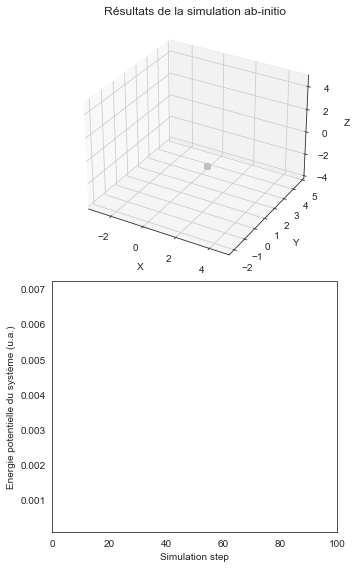

In [6]:
#Loader du fichier .xyz
def load_data(file):
    o1_index=[2]
    o2_index=[3]
    h1_index=[4]
    h2_index=[5]
    h3_index=[6]
    h4_index=[7]
    h5_index=[8]

    o1=[]
    o2=[]
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]

    with open(file, 'r') as infile:

        for index, line in enumerate(infile):
            items = line.split()

            if index%9 in o1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o1.append([0,x,y,z])

            if index%9 in o2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o2.append([0,x,y,z])

            if index%9 in h1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h1.append([1,x,y,z])   

            if index%9 in h2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h2.append([1,x,y,z])

            if index%9 in h3_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h3.append([1,x,y,z])

            if index%9 in h4_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h4.append([1,x,y,z])

            if index%9 in h5_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h5.append([1,x,y,z])
                
    return np.concatenate((o1, o2, h1, h2, h3, h4, h5), axis=1).reshape(10000, 7, 4) #10000 fois 7 colomnes de 4 éléments  (particule, x, y, z)

#Loader de l'output de la simulation (fichier .out)
output=pd.read_csv('new_energies_sparse.out', sep=' ', header=None)

#Extraction des énergies (5eme colonne)
energies=output[4]

#Load du fichier .xyz
dataset=load_data("new_positions_sparse.xyz")

#################
# Plot des données (Animation 3D + Energie)
#################

#Nombre de data utilisées pour l'animation
N=100

#Init animation 2D
def init():
    return graph,

#Fonction update plot energies
def update_en(num):
    graph.set_data(x[:num],y[:num])
    return graph,

#Mise en forme des trajectoires
def transform_data(X, Y, Z):
    t = np.vstack((X, Y, Z))
    return t

#Fonction update pour le plot des trajectoires
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, num-1:num])
        line.set_3d_properties(data[2,num-1:num])
    return lines

#Fonction update des deux plots
def update_both(num, data2, line2):
    update_en(num)
    update_lines(num, data2, line2)
    
#Création de la figure
fig= plt.figure(figsize=(5, 8))

#ax1 = plot des énergies
ax1=fig.add_subplot(2, 1, 2) 
ax1.set_xlim(0, N)
ax1.set_ylim(np.min(energies), np.max(energies))
ax1.set_xlabel("Simulation step")
ax1.set_ylabel("Energie potentielle du système (u.a.)")

graph, = plt.plot([], [], '-')

#ax = plot des trajectoires
ax=fig.add_subplot(2, 1, 1, projection='3d')

ax.set_xlim3d([np.min(dataset[:, :, 1][:N]), np.max(dataset[:, :, 1][:N])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min(dataset[:, :, 2][:N]), np.max(dataset[:, :, 2][:N])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min(dataset[:, :, 3][:N]), np.max(dataset[:, :, 3][:N])])
ax.set_zlabel('Z')

ax.set_title('Résultats de la simulation ab-initio')

plt.tight_layout()

# Données de l'énergie
x = range(N)
y = energies[:N]

# Données 3D
data=[]
lines=[]
colors=['r', 'r', 'silver','silver', 'silver', 'silver', 'silver'] #couleur des atomes
for i in range(dataset.shape[1]):
    coord=dataset[:, i][:N]
    X=coord[:, 1]
    Y=coord[:, 2]
    Z=coord[:, 3]
    data.append(transform_data(X, Y, Z))
    
    lines.append(ax.plot(data[0][0,0:1], data[0][1,0:1], data[0][2,0:1], 'o', color=colors[i])[0])

# Objet d'animation
ani = animation.FuncAnimation(fig, update_both, len(X), fargs=(data, lines),
                              interval=100, blit=False)

# ani.save('ab-initio.mp4')
plt.show()

Deuxième option pour tracer les postions :

In [7]:
nv.show_mdtraj(mdt.load_xyz("new_positions_sparse.xyz", top='zundel.pdb'))

OSError: No such file: zundel.pdb

## Séparation des données ##

In [8]:
#Séparation des données
print("data shape :", dataset.shape)
print("target shape :", energies.shape)
X_train, X_test, y_train, y_test=train_test_split(dataset, energies, random_state=22)

#Scaling des y
yscaler=StandardScaler()
y_train=yscaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=yscaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

data shape : (10000, 7, 4)
target shape : (10000,)


# Descripteurs #

## Descripteurs géometriques ##

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


dO_O moyen : 4.53007034788335  +-  0.05661715866559092


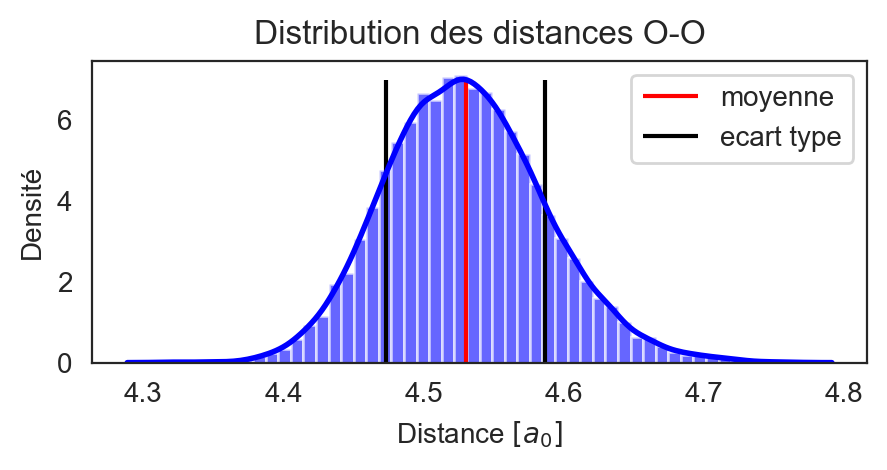

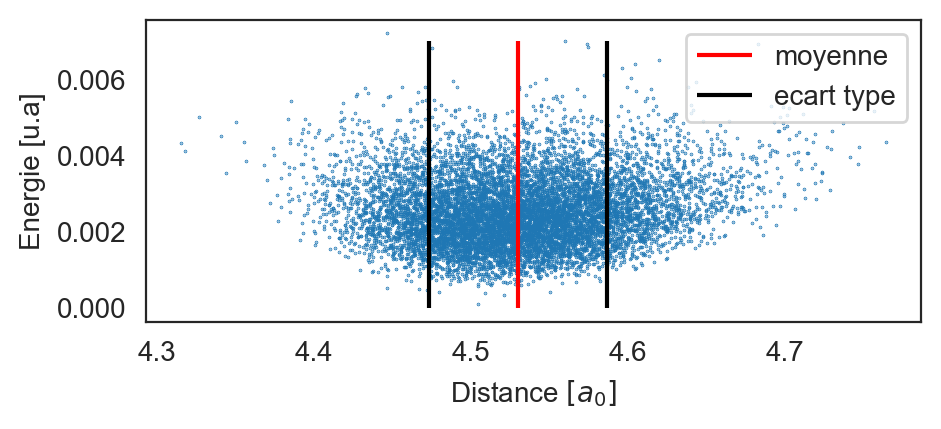

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


dO1_H moyen : 2.27340180914684  +-  0.12949155504015944


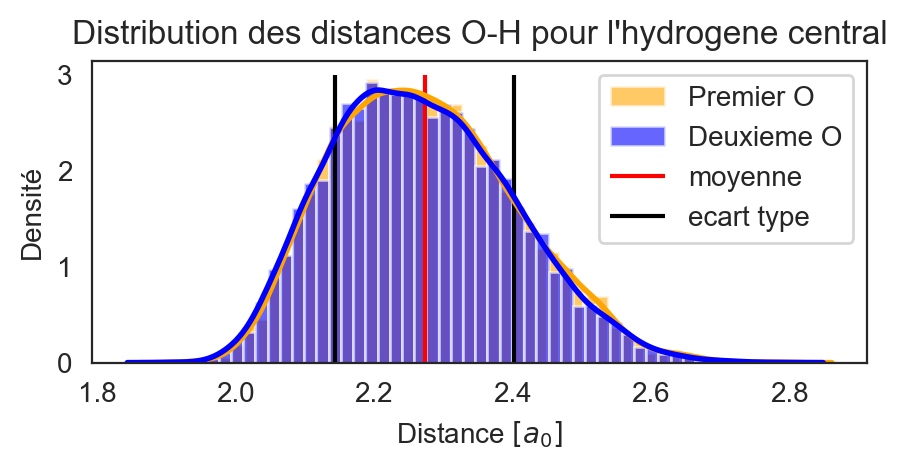

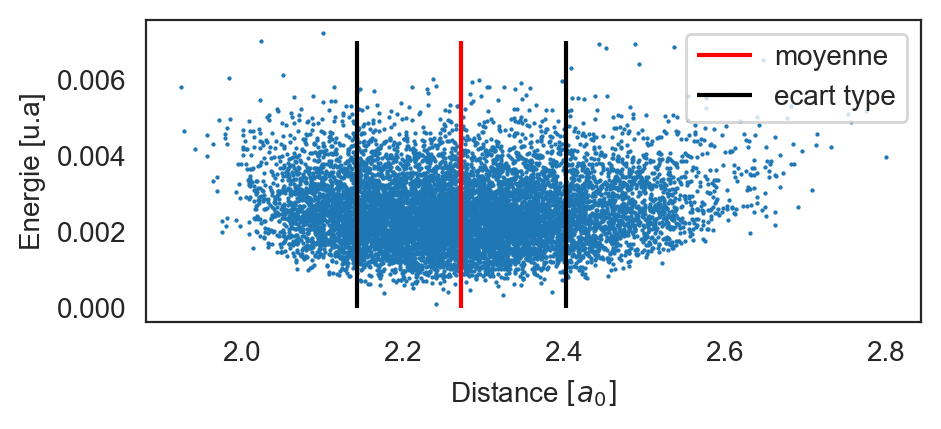

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


H22_O2_H21 moyen : 108.90639931766596  +-  2.813481373777933


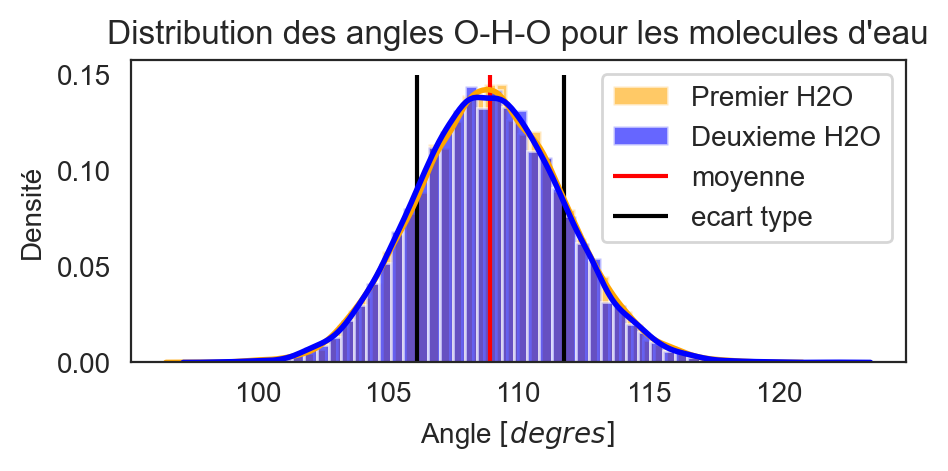

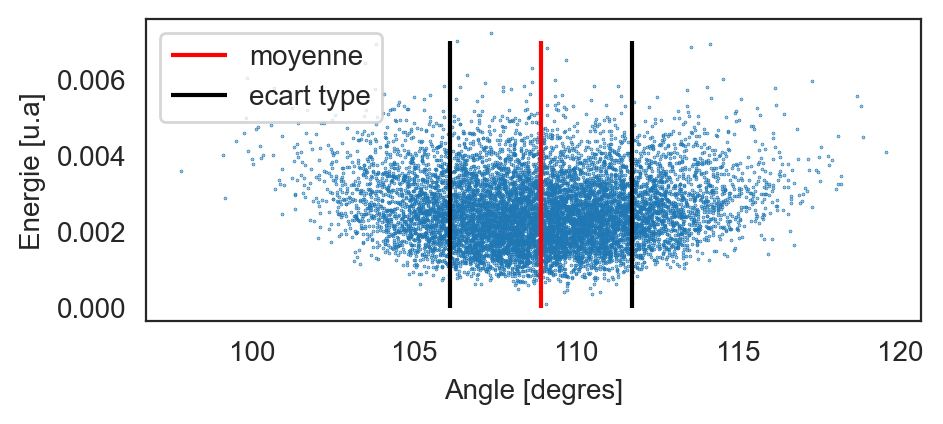

In [13]:
import seaborn as sns
sns.set_style("white")
#Coordonées spatiales pour chaque atome
O1=dataset[:,0,1:4]
O2=dataset[:,1,1:4]
H=dataset[:,2,1:4]
H11=dataset[:,5,1:4]
H12=dataset[:,6,1:4]
H21=dataset[:,3,1:4]
H22=dataset[:,4,1:4]

#Calcul des Coordonnées vectorielles des atomes 
O2_O1=O1-O2
O2_H=H-O2
O1_H=H-O1
O1_H11=H11-O1
O1_H12=H12-O1
O2_H21=H21-O2
O2_H22=H22-O2

#calcul des distances et angles interessants
dO_O=np.linalg.norm(O2_O1,axis=1)
dO1_H=np.linalg.norm(O1_H,axis=1)
dO2_H=np.linalg.norm(O2_H,axis=1)

H22_O2_H21 = vg.angle(O2_H21,O2_H22)
H21_O1_H11 = vg.angle(O1_H11,O1_H12)

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(dO_O), color="blue", **kwargs)
plt.vlines(dO_O.mean(),0,7,color="red", label="moyenne")
plt.vlines(dO_O.mean()+dO_O.std(),0,7, label="ecart type",color="k")
plt.vlines(dO_O.mean()-dO_O.std(),0,7, color="k")
print("dO_O moyen :",dO_O.mean()," +- ",dO_O.std())

plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Densité")

plt.title("Distribution des distances O-O")
plt.show()

plt.figure(figsize=(5,2), dpi= 200)
plt.scatter(dO_O,energies,s=0.3,marker='.')
plt.vlines(dO_O.mean(),0,0.007,color="red", label="moyenne")
plt.vlines(dO_O.mean()+dO_O.std(),0,0.007, label="ecart type",color="k")
plt.vlines(dO_O.mean()-dO_O.std(),0,0.007, color="k")

plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Energie [u.a]")

plt.show()


plt.figure(figsize=(5,2), dpi= 200)

sns.distplot(pd.DataFrame(dO1_H), color="orange", label="Premier O", **kwargs)
sns.distplot(pd.DataFrame(dO2_H), color="blue", label="Deuxieme O", **kwargs)
plt.vlines(dO1_H.mean(),0,3,color="red", label="moyenne")
plt.vlines(dO1_H.mean()+dO1_H.std(),0,3, label="ecart type",color="k")
plt.vlines(dO1_H.mean()-dO1_H.std(),0,3, color="k")
print("dO1_H moyen :",dO1_H.mean()," +- ",dO1_H.std())

plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Densité")

plt.title("Distribution des distances O-H pour l'hydrogene central")

plt.show()

plt.figure(figsize=(5,2), dpi= 200)
plt.scatter(dO1_H,energies,s=0.3)
plt.vlines(dO1_H.mean(),0,0.007,color="red", label="moyenne")
plt.vlines(dO1_H.mean()+dO1_H.std(),0,0.007, label="ecart type",color="k")
plt.vlines(dO1_H.mean()-dO1_H.std(),0,0.007, color="k")

plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Energie [u.a]")

plt.show()

plt.figure(figsize=(5,2), dpi= 200)

sns.distplot(pd.DataFrame(H22_O2_H21), color="orange", label="Premier H2O", **kwargs)
sns.distplot(pd.DataFrame(H21_O1_H11), color="blue", label="Deuxieme H2O", **kwargs)
plt.vlines(H22_O2_H21.mean(),0,0.15,color="red", label="moyenne")
plt.vlines(H22_O2_H21.mean()+H22_O2_H21.std(),0,0.15, label="ecart type",color="k")
plt.vlines(H22_O2_H21.mean()-H22_O2_H21.std(),0,0.15, color="k")
print("H22_O2_H21 moyen :",H22_O2_H21.mean()," +- ",H22_O2_H21.std())

plt.xlabel(r'Angle $[degres]$')
plt.ylabel("Densité")

plt.title("Distribution des angles O-H-O pour les molecules d'eau")
plt.legend()

plt.show()

plt.figure(figsize=(5,2), dpi= 200)
plt.scatter(H22_O2_H21,energies,s=0.3,marker='.')
plt.vlines(H22_O2_H21.mean(),0,0.007,color="red", label="moyenne")
plt.vlines(H22_O2_H21.mean()+H22_O2_H21.std(),0,0.007, label="ecart type",color="k")
plt.vlines(H22_O2_H21.mean()-H22_O2_H21.std(),0,0.007, color="k")

plt.legend()
plt.xlabel(r'Angle [degres]')
plt.ylabel("Energie [u.a]")
plt.show()

## Permutation Invariant Vector (PIV) ##

In [14]:
#Fonction de switch (voir dans le rapport) de type Fermi-Dirac
def C(rmin, rmax, x): 
    a=20/(rmax-rmin) #pente pour la bijection (rmin, rmax) => (-10, 10)

    bij=a*x+10-a*rmax #bijection (modèle affine)
    y=1/(np.exp(0.3*bij)+1) #calcul de la valeur de la fonction de switch
    return y

#Descripteur PIV
# X : dataset d'entrée
# pca_d : nombre de composantes conservées lors de la pca
# label : label pour le plot retourné
def PIV_descr(X, pca_d=10, label='label'):
    piv=[]
    for i in range(len(X)): #pour chaque configuration
        dist=distance.cdist(X[i][:, 1:], X[i][:, 1:], 'euclidean') #calcul de la distance entre chaque paire d'atomes
        
        #décomposition de la matrice obtenue par type d'interactions (O-O, O-H, H-H)
        a=np.array([dist[0, 1]]) #interaction O-O
        b=np.concatenate((dist[0, 2:],dist[1, 2:])) #interaction O-H
        c=[] #interaction H-H
        for i in range(2, dist.shape[0]):
            c=np.concatenate((c, dist[i, i+1:]))
        
        brmin=np.min(b)
        brmax=np.max(b)
        
        crmin=np.min(c)
        crmax=np.max(c)
        
        #evaluation de la fonction de switch
        aswitched=C(brmin, brmax, a)
        bswitched=C(brmin, brmax, b)
        cswitched=C(crmin, crmax, c)
        
        #tri des valeurs par ordre ascendant dans chaque bloc
        bs=np.sort(bswitched)
        cs=np.sort(cswitched)
        
        #création du vecteur par concaténation
        piv.append(np.concatenate((aswitched, bs, cs)))
        
    #PCA sur le vecteur obtenu
    data_2d = np.array([features_2d.flatten() for features_2d in piv])
    pca = PCA(n_components=pca_d)
    pca.fit(data_2d)
    piv_pca = pca.transform(data_2d)
    print("original shape:   ", piv_pca.shape) 
    print("transformed shape:", piv_pca.shape)
    
    plt.plot(np.cumsum(pca.explained_variance_ratio_), linestyle='--', marker='o', label=label)
    plt.xlabel("Nombre de composantes")
    plt.ylabel('Variance totale expliquée')
    return piv_pca

**Création et scaling des descripteurs**

original shape:    (7500, 10)
transformed shape: (7500, 10)
original shape:    (2500, 10)
transformed shape: (2500, 10)


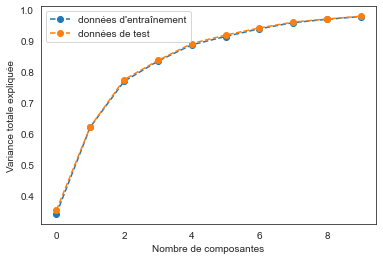

In [17]:
scaler=StandardScaler()

X_train_PIV=PIV_descr(X_train, label="données d'entraînement")
X_train_PIV_red=scaler.fit_transform(X_train_PIV)
X_test_PIV=PIV_descr(X_test, label="données de test")
X_test_PIV_red=scaler.fit_transform(X_test_PIV)
plt.legend()

## Matrices de Coulomb ##

In [18]:
#Fonction pour la création de la matrice de Coulomb à partir d'un dataset
def create_CM(data):
    cm = CoulombMatrix(n_atoms_max=7) #matrice de Coulomb de dimensions 7
    zundel_steps=[]
    for i in range(data.shape[0]): #on ajoute chaque configuration
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

## **Exploration statistique des matrices de Coulomb**. ##

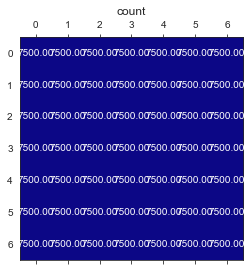

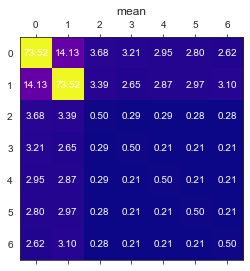

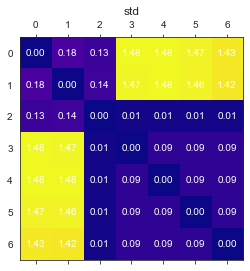

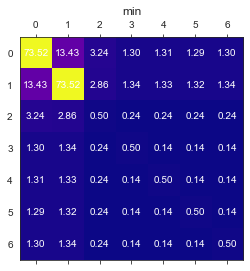

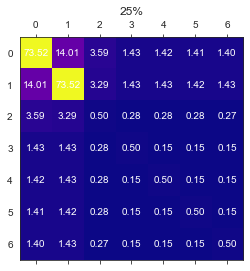

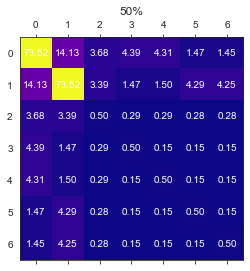

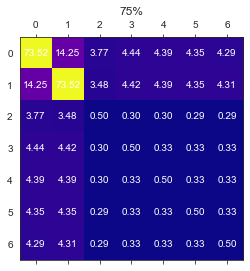

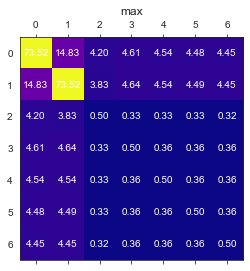

In [19]:
#création des matrices de Coulomb pour les données d'entrainement
X_train_CM=create_CM(X_train)
X_test_CM=create_CM(X_test)

#scaling des données (centrées réduites)
scaler=StandardScaler()
X_train_CM_red=scaler.fit_transform(X_train_CM)
X_test_CM_red=scaler.fit_transform(X_test_CM)

#conversion dans un Dataset pour explorer les données statistiquement avec les outils pandas
X_train_DF=pd.DataFrame(X_train_CM)

stat=X_train_DF.describe()

statnp=stat.to_numpy().reshape(8, 7, 7)

#Plot des stats sous forme de matrice colorée
for i, l in enumerate(stat.index):
    plt.matshow(statnp[i], cmap="plasma")
    for (x, y), value in np.ndenumerate(statnp[i]):
        plt.text(x, y, f"{value:.2f}", va="center", ha="center", color="white")
    plt.title(l)

Exemple de matrice de Coulomb :

Text(0.5, 1.0, 'Exemple de matrice de Coulomb')

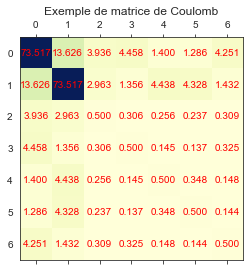

In [20]:
plt.matshow(create_CM(X_train)[0].reshape(7, 7), cmap="YlGnBu")

for (x, y), value in np.ndenumerate(create_CM(X_train)[0].reshape(7, 7)):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center", color="red")
    
plt.title("Exemple de matrice de Coulomb")

## Matrices de Coulomb version Eigenspectrum ##

In [21]:
#même fonction que précédemment mais en ne retenant que les valeurs propres
def create_CM_eigen(data):
    cm = CoulombMatrix(n_atoms_max=7, permutation='eigenspectrum')
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

**Création et scaling des descripteurs**

In [22]:
X_train_CMe=create_CM_eigen(X_train)
X_test_CMe=create_CM_eigen(X_test)
X_train_CMe_red=scaler.fit_transform(X_train_CMe)
X_test_CMe_red=scaler.fit_transform(X_test_CMe)

### **Exploration statistique du nouveau descripteur** 

In [23]:
pd.DataFrame(X_train_CMe).describe()

,0,1,2,3,4,5,6
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,88.701505,59.682468,0.417565,0.242826,0.173534,0.162842,0.152649
std,0.183102,0.177838,0.009194,0.006553,0.004729,0.004301,0.005124
min,87.977655,58.979104,0.388062,0.219960,0.157364,0.143278,0.131788
25%,88.582326,59.559842,0.411327,0.238478,0.170198,0.159958,0.149336
50%,88.705274,59.678830,0.417490,0.242890,0.173346,0.162958,0.152911
75%,88.827863,59.797708,0.423616,0.247244,0.176679,0.165817,0.156172
max,89.435804,60.383806,0.453386,0.267795,0.194823,0.178765,0.169214


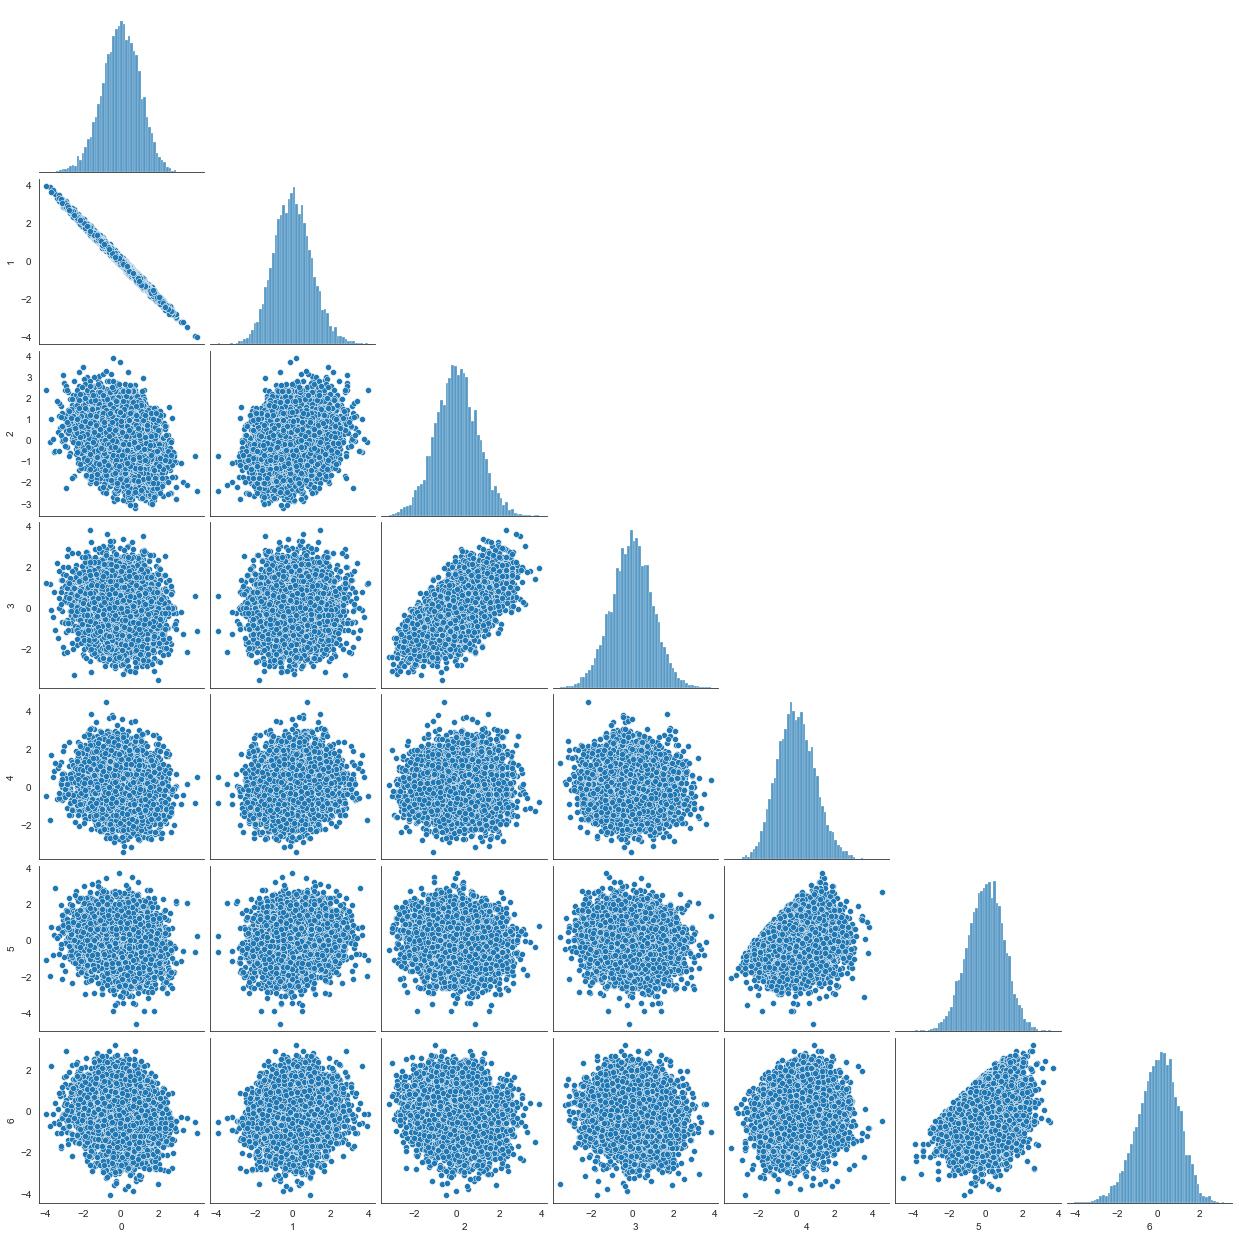

In [24]:
#plot des corrélations

sns.pairplot(pd.DataFrame(X_train_CMe_red), corner=True)

## SOAP ##

In [25]:
from dscribe.descriptors import SOAP
from ase.io import read
from sklearn.decomposition import PCA
from dscribe.kernels import AverageKernel

#genere un ensemble de vecteurs soap avec PCA
def SOAP_Vectors(xyz_filename,cutoff=5., n_max=6, l_max=6, zeta=2.0, atom_sigma=0.5, pca_d=25):
    # read the xyz file
    frames = read(xyz_filename, ':')
    n_frames = len(frames)

    # species and PBC
    global_species = []
    for frame in frames:
        global_species.extend(frame.get_atomic_numbers())
        frame.set_pbc(True)
    global_species = np.unique(global_species)
    print("loaded xyz file: {fn}, with {n_frames} frames and elements: {ele}".format(fn=xyz_filename, n_frames=n_frames,
                                                                                     ele=global_species))
    # soap
    desc = SOAP(rcut=cutoff, nmax=n_max, lmax=l_max, sigma=atom_sigma, species=global_species, periodic=False,
                average="off")
    soap_vectors = desc.create(frames)
    data_2d = np.array([features_2d.flatten() for features_2d in soap_vectors])
    pca = PCA(n_components=pca_d)
    pca.fit(data_2d)
    Soap_pca = pca.transform(data_2d)
    return Soap_pca,pca

#genere un ensemble de vecteurs soap avec une PCA deja entrainée pour une unique configuration atomique 
def SOAP_Vector(xyz_filename, pca,cutoff=5., n_max=6, l_max=6, zeta=2.0,atom_sigma=0.5):
    # read the xyz file
    frames = read(xyz_filename, ':')
    # species and PBC
    global_species = []
    for frame in frames:
        global_species.extend(frame.get_atomic_numbers())
        frame.set_pbc(True)
    global_species = np.unique(global_species)
    # soap
    desc = SOAP(rcut=cutoff, nmax=n_max, lmax=l_max, sigma=atom_sigma, species=global_species, periodic=False,average="off")
    soap_vectors = desc.create(frames)
    data_2d = np.array([soap_vectors.flatten()]).reshape(1, -1)
    Soap_pca = pca.transform(data_2d)

    return Soap_pca



**Séparation des données et création des descripteurs**

In [26]:
Soap_pca,pca=SOAP_Vectors("new_positions_sparse.xyz", cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca_d=15)

loaded xyz file: new_positions_sparse.xyz, with 10000 frames and elements: [1 8]


In [27]:
X_train_soap, X_test_soap, y_train, y_test=train_test_split(Soap_pca, energies, random_state=22)

X_train_soap_red=scaler.fit_transform(X_train_soap)
X_test_soap_red=scaler.fit_transform(X_test_soap)

yscaler=StandardScaler()
y_train=yscaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=yscaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

Text(0, 0.5, 'Variance totale expliquée')

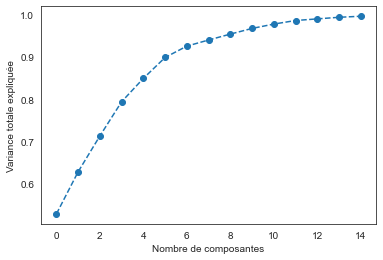

In [28]:
#Plot de la variance totale expliquée
plt.plot(np.cumsum(pca.explained_variance_ratio_), linestyle='--', marker='o')
plt.xlabel("Nombre de composantes")
plt.ylabel('Variance totale expliquée')

# Modèles et apprentissage #

## **Prédicteur naif** ##

In [29]:
#retourne la valeur moyenne
def naive_predictor(xtrain, ytrain):
    return np.ones((xtrain.shape[0],))*ytrain.mean()

#résultats du modèle naïf (ici on peut utiliser n'importe quel descripteur)
y_fit=naive_predictor(X_train, y_train)
y_pred_test=naive_predictor(X_test,y_train)

#erreur quadratique moyenne
mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)

print("Erreur quadratique moyenne sur les données d'entraînement : ", mse)
print("Erreur quadratique moyenne sur les données de test : ",mse_test)

Erreur quadratique moyenne sur les données d'entraînement :  1.0
Erreur quadratique moyenne sur les données de test :  1.0


Plot des y_test en fonction de y_pred

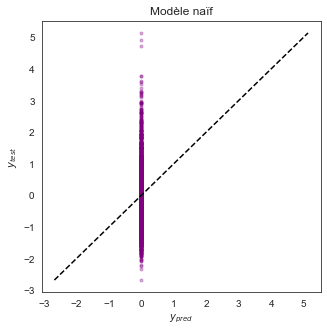

In [30]:
fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')

#on récupère les limites du plot
xmin, xmax=plt.xlim()
ymin, ymax=plt.ylim()

#ligne du prédicteur idéal
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Modèle naïf")

plt.show()

## **Modèle linéaire** ##

### Modèle de regession Ridge avec recherche sur grille ###

In [31]:
#Test avec Matrices de Coulomb

#paramètres testés
a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("MSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_CMe_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print("MSE sur les données de test : ", mse_test_rcv)

Best regularization parameter : 17.030650292528428
MSE moyen: 0.7911226116852111
MSE sur les données de test :  0.7564859632709957


In [32]:
#Test avec PIV 
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_PIV_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("MSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_PIV_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print("MSE sur les données de test : ", mse_test_rcv)

Best regularization parameter : 28.278179796253383
MSE moyen: 0.732613775574381
MSE sur les données de test :  0.7119053592975245


### Modèle linéaire en dimension augmentée (polynomial Features) ###

In [33]:
mse_list=[] #liste qui stocke la mse pour le train set
mse_test_list=[] #idem pour le test set
for d in range(1,5): #on teste des degrés de 1 à 5
    poly=PolynomialFeatures(degree=d)
    Zmodif=poly.fit_transform(X_train_CMe_red)
    Zmodif_test=poly.fit_transform(X_test_CMe_red)
    
    #recherche sur grille
    a=np.logspace(-10, 10, 1000)
    model=RidgeCV(alphas=a)
    model.fit(Zmodif, y_train)

    print("Best regularization parameter :", model.alpha_)
    print("MSE moyen:", -model.best_score_)

    y_pred_test_rcv=model.predict(Zmodif_test)
    mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
    print("MSE sur le set de test :", mse_test_rcv)
    
    #stockage des meilleurs scores
    mse_list.append(-model.best_score_)
    mse_test_list.append(mse_test_rcv)

Best regularization parameter : 17.030650292528428
MSE moyen: 0.7911226116852113
MSE sur le set de test : 0.7564859632710083
Best regularization parameter : 14.162866162991973
MSE moyen: 0.5399559357654161
MSE sur le set de test : 0.5213666113616616
Best regularization parameter : 17.030650292528428
MSE moyen: 0.5402247037401428
MSE sur le set de test : 0.5217424378170666
Best regularization parameter : 42.818517986524064
MSE moyen: 0.5518063896545434
MSE sur le set de test : 0.5342317688277887


Text(0.5, 0, 'Dimension du polynome')

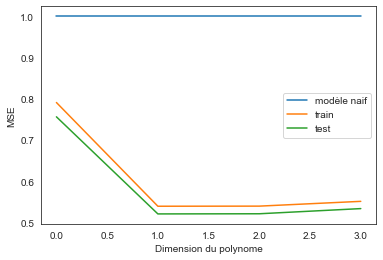

In [34]:
#plot des résultats
plt.plot([1]*len(mse_list), label='modèle naif')
plt.plot(mse_list, label="train")
plt.plot(mse_test_list, label='test')
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Dimension du polynome")

## Kernel Ridge Regression - Recherche sur grille ##

### PIV ###

In [35]:
krrPIV = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-13, -10,4),
                                                                          "gamma": np.logspace(-7, -5, 4)})
krrPIV.fit(X_train_PIV_red, y_train)

y_pred_test_krr_PIV=krrPIV.predict(X_test_PIV_red)

mse_test_PIV=mean_squared_error(np.array(y_test), y_pred_test_krr_PIV)
b_params_PIV=krrPIV.best_params_
print("MSE : ", mse_test_PIV)
print("Meilleurs paramètres : ",b_params_PIV)

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.61249e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.39347e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.7956e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.45434e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.49664e-1

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.5629e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=8.82479e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.57123e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.61236e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.69595e-1

MSE :  0.5844247340118286
Meilleurs paramètres :  {'alpha': 1e-10, 'gamma': 1e-05}


0.5844247340118286


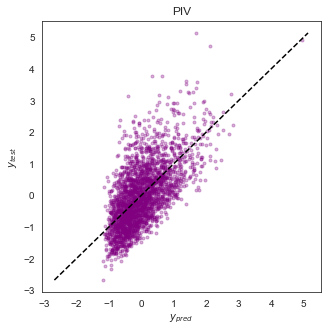

(7500, 10)


In [36]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_PIV=krrPIV.predict(X_test_PIV_red)
plt.scatter(y_pred_test_krr_PIV,  y_test, marker='.', color='purple',alpha=0.3)
mse_test_PIV=mean_squared_error(np.array(y_test), y_pred_test_krr_PIV)
print(mse_test_PIV)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("PIV")
plt.show()
print(X_train_PIV_red.shape)

### Coulomb Matrix ###

In [37]:
krrcm = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-11, -10,4),
                                                                          "gamma": np.logspace(-5, -3,4)})
krrcm.fit(X_train_CM_red, y_train)

y_pred_test_krr_cm=krrcm.predict(X_test_CM_red)

mse_test_cm=mean_squared_error(np.array(y_test), y_pred_test_krr_cm)
b_params_cm=krrcm.best_params_
print("MSE : ", mse_test_cm)
print("Meilleurs paramètres : ",b_params_cm)

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.08106e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.09593e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.09094e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.06055e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.88952e-

MSE :  0.9167550999982191
Meilleurs paramètres :  {'alpha': 4.641588833612773e-11, 'gamma': 0.001}


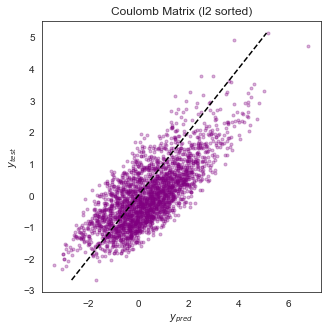

In [38]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_cm=krrcm.predict(X_test_CM_red)
plt.scatter(y_pred_test_krr_cm,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.title("Coulomb Matrix (l2 sorted)")
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.show()

### Coulomb Matrix Eigenvalues ###

In [39]:
krrcmeig = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-10, -9,4),
                                                                          "gamma": np.logspace(-5, -4,4)})
krrcmeig.fit(X_train_CMe_red, y_train)

y_pred_test_krr_cmeig=krrcmeig.predict(X_test_CMe_red)

mse_test_cmeig=mean_squared_error(np.array(y_test), y_pred_test_krr_cmeig)
b_params_cmeig=krrcmeig.best_params_
print("MSE : ", mse_test_cmeig)
print("Meilleurs paramètres : ",b_params_cmeig)

MSE :  0.5208115911258475
Meilleurs paramètres :  {'alpha': 2.1544346900318867e-10, 'gamma': 1e-05}


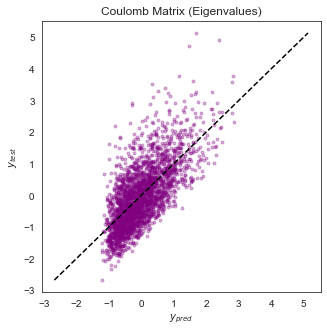

In [40]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_cmeig=krrcmeig.predict(X_test_CMe_red)
plt.scatter(y_pred_test_krr_cmeig,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Coulomb Matrix (Eigenvalues)")
plt.show()

### Comparaison CM/PIV ###

In [41]:
#tirer des points au hasard dans le dataset et créer les descripteurs PIV et CMeig associés et retourner la valeur de la prediction
def random(dataset, energies, PIV, CMeig, N):
    idx=np.random.randint(len(dataset), size=N) #index tirés au hasard
    y_pred_PIV=krrPIV.predict(PIV[idx])
    y_pred_cmeig=krrcmeig.predict(CMeig[idx])
    
    return energies[idx], y_pred_PIV, y_pred_cmeig
    
ysample, PIVsample, CMeigsample = random(X_test, y_test, X_test_PIV_red, X_test_CMe_red, 15)

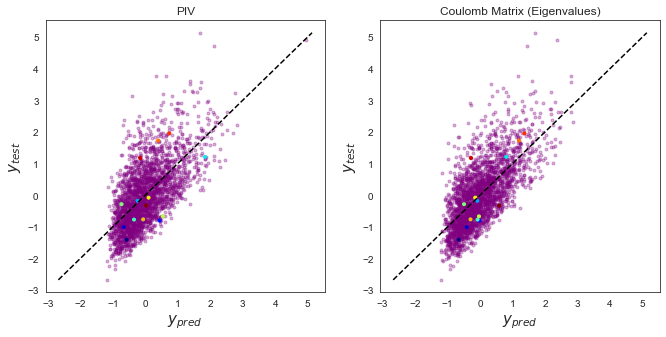

In [42]:
#Plot des points tirés au hasard

fig=plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.xlabel('$y_{pred}$', fontsize=15)
plt.ylabel('$y_{test}$', fontsize=15)
colors = plt.cm.jet(np.linspace(0, 1, len(ysample)))
plt.scatter(y_pred_test_krr_PIV,  y_test, marker='.', color='purple',alpha=0.3)
plt.scatter(PIVsample, ysample, marker='.', color=colors,alpha=1)
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("PIV")

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test_krr_cmeig,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$', fontsize=15)
plt.ylabel('$y_{test}$', fontsize=15)
plt.scatter(CMeigsample, ysample, marker='.', color=colors,alpha=1)
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Coulomb Matrix (Eigenvalues)")
plt.show()

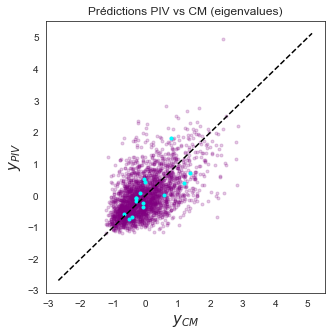

In [43]:
# plot y_CM en fct de y_PIV + 10 points en cyan tirés au hasard

fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test_krr_cmeig,  y_pred_test_krr_PIV, marker='.', color='purple',alpha=0.2)
plt.scatter(CMeigsample, PIVsample, marker='.', color='cyan',alpha=1)
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')

plt.xlabel('$y_{CM}$', fontsize=15)
plt.ylabel('$y_{PIV}$', fontsize=15)
#plt.scatter(CMeigsample, ysample, marker='.', color=colors,alpha=1)

plt.title("Prédictions PIV vs CM (eigenvalues)")
plt.show()

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


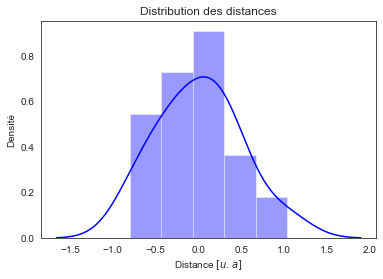

Ecart type :  0    0.475148
dtype: float64


In [44]:
#histogramme des distances entre les deux modèles

sns.distplot(pd.DataFrame((PIVsample-CMeigsample)), color="blue")
plt.xlabel(r'Distance $[u.a]$')
plt.ylabel("Densité")

plt.title("Distribution des distances")
plt.show()

print("Ecart type : ", np.std(pd.DataFrame((PIVsample-CMeigsample))))

### SOAP ###

In [45]:
krrsoap = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-11.5, -10.5,4),
                                                                          "gamma": np.logspace(-7,-5,6)})
krrsoap.fit(X_train_soap_red, y_train)

y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)

mse_test_soap=mean_squared_error(np.array(y_test), y_pred_test_krr_soap)
b_params_soap=krrsoap.best_params_
print("MSE : ", mse_test_soap)
print(b_params_soap)

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.27127e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.73018e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.11427e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.09831e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.52251e-

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.60441e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.03591e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=8.38032e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=8.54785e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.05774e-

MSE :  0.1913298981485932
{'alpha': 6.8129206905796225e-12, 'gamma': 3.981071705534969e-06}


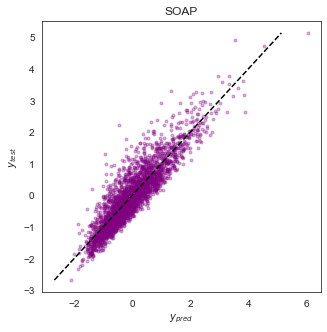

In [46]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)
plt.scatter(y_pred_test_krr_soap,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("SOAP")
plt.show()

## **Réseau de neurones** ##

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 12)                192       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 4ms/step - loss: 1.1701 - mean_squared_error: 1.1701 - val_loss: 0.8104 - val_mean_squared_error: 0.8104
Epoch 2/300
94/94 [==============================] - 0s 2ms/step - loss: 0.8067 - mean_squared_error: 0.8067 - val_loss: 0.7234 - val_mean_squared_error: 0.7234


94/94 [==============================] - 0s 2ms/step - loss: 0.2408 - mean_squared_error: 0.2408 - val_loss: 0.2766 - val_mean_squared_error: 0.2766
Epoch 47/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2364 - mean_squared_error: 0.2364 - val_loss: 0.2749 - val_mean_squared_error: 0.2749
Epoch 48/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2360 - mean_squared_error: 0.2360 - val_loss: 0.2731 - val_mean_squared_error: 0.2731
Epoch 49/300
94/94 [==============================] - 0s 3ms/step - loss: 0.2344 - mean_squared_error: 0.2344 - val_loss: 0.2664 - val_mean_squared_error: 0.2664
Epoch 50/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2317 - mean_squared_error: 0.2317 - val_loss: 0.2617 - val_mean_squared_error: 0.2617
Epoch 51/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2313 - mean_squared_error: 0.2313 - val_loss: 0.2619 - val_mean_squared_error: 0.2619
Epoch 52/300
94/94 [=====================

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2053 - mean_squared_error: 0.2053 - val_loss: 0.2409 - val_mean_squared_error: 0.2409
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2045 - mean_squared_error: 0.2045 - val_loss: 0.2445 - val_mean_squared_error: 0.2445
Epoch 99/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2051 - mean_squared_error: 0.2051 - val_loss: 0.2419 - val_mean_squared_error: 0.2419
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2046 - mean_squared_error: 0.2046 - val_loss: 0.2436 - val_mean_squared_error: 0.2436
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2057 - mean_squared_error: 0.2057 - val_loss: 0.2409 - val_mean_squared_error: 0.2409
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2049 - mean_squared_error: 0.2049 - val_loss: 0.2378 - val_mean_squared_error: 0.2378
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 2ms/step - loss: 0.1975 - mean_squared_error: 0.1975 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 148/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1956 - mean_squared_error: 0.1956 - val_loss: 0.2477 - val_mean_squared_error: 0.2477
Epoch 149/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1979 - mean_squared_error: 0.1979 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 150/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1960 - mean_squared_error: 0.1960 - val_loss: 0.2372 - val_mean_squared_error: 0.2372
Epoch 151/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1963 - mean_squared_error: 0.1963 - val_loss: 0.2369 - val_mean_squared_error: 0.2369
Epoch 152/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1963 - mean_squared_error: 0.1963 - val_loss: 0.2397 - val_mean_squared_error: 0.2397
Epoch 153/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.1928 - mean_squared_error: 0.1928 - val_loss: 0.2334 - val_mean_squared_error: 0.2334
Epoch 198/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1923 - mean_squared_error: 0.1923 - val_loss: 0.2395 - val_mean_squared_error: 0.2395
Epoch 199/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1945 - mean_squared_error: 0.1945 - val_loss: 0.2406 - val_mean_squared_error: 0.2406
Epoch 200/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1937 - mean_squared_error: 0.1937 - val_loss: 0.2360 - val_mean_squared_error: 0.2360
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1939 - mean_squared_error: 0.1939 - val_loss: 0.2384 - val_mean_squared_error: 0.2384
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1925 - mean_squared_error: 0.1925 - val_loss: 0.2416 - val_mean_squared_error: 0.2416
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.1898 - mean_squared_error: 0.1898 - val_loss: 0.2398 - val_mean_squared_error: 0.2398
Epoch 248/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1899 - mean_squared_error: 0.1899 - val_loss: 0.2399 - val_mean_squared_error: 0.2399
Epoch 249/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1894 - mean_squared_error: 0.1894 - val_loss: 0.2389 - val_mean_squared_error: 0.2389
Epoch 250/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1912 - mean_squared_error: 0.1912 - val_loss: 0.2432 - val_mean_squared_error: 0.2432
Epoch 251/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1892 - mean_squared_error: 0.1892 - val_loss: 0.2405 - val_mean_squared_error: 0.2405
Epoch 252/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1905 - mean_squared_error: 0.1905 - val_loss: 0.2379 - val_mean_squared_error: 0.2379
Epoch 253/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.1895 - mean_squared_error: 0.1895 - val_loss: 0.2355 - val_mean_squared_error: 0.2355
Epoch 298/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1883 - mean_squared_error: 0.1883 - val_loss: 0.2407 - val_mean_squared_error: 0.2407
Epoch 299/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1881 - mean_squared_error: 0.1881 - val_loss: 0.2368 - val_mean_squared_error: 0.2368
Epoch 300/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1880 - mean_squared_error: 0.1880 - val_loss: 0.2374 - val_mean_squared_error: 0.2374


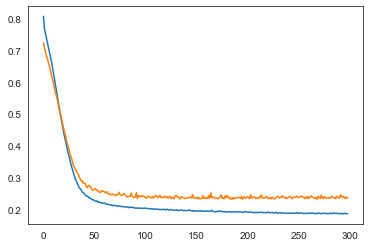

In [47]:
#on renomme les variables
X_soap_red=X_train_soap_red
y_soap=y_train

#création du modèle
model=Sequential()
model.add(Dense(units=15, activation='tanh', input_shape=(15,)))
model.add(Dense(units=12, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])

Hist=model.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist.history['loss'][1:])
plt.plot(Hist.history['val_loss'][1:])

### Modèle régularisé ###

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dense_4 (Dense)             (None, 12)                192       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 5ms/step - loss: 1.5370 - mean_squared_error: 0.9023 - val_loss: 1.2640 - val_mean_squared_error: 0.7713
Epoch 2/300
94/94 [==============================] - 0s 2ms/step - loss: 1.1749 - mean_squared_error: 0.7844 - val_loss: 1.0078 - val_mean_squared_error: 0.706

94/94 [==============================] - 0s 2ms/step - loss: 0.4430 - mean_squared_error: 0.3758 - val_loss: 0.4547 - val_mean_squared_error: 0.3874
Epoch 47/300
94/94 [==============================] - 0s 1ms/step - loss: 0.4345 - mean_squared_error: 0.3667 - val_loss: 0.4475 - val_mean_squared_error: 0.3799
Epoch 48/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4331 - mean_squared_error: 0.3655 - val_loss: 0.4426 - val_mean_squared_error: 0.3753
Epoch 49/300
94/94 [==============================] - 0s 1ms/step - loss: 0.4291 - mean_squared_error: 0.3618 - val_loss: 0.4451 - val_mean_squared_error: 0.3779
Epoch 50/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4220 - mean_squared_error: 0.3547 - val_loss: 0.4558 - val_mean_squared_error: 0.3888
Epoch 51/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4190 - mean_squared_error: 0.3526 - val_loss: 0.4364 - val_mean_squared_error: 0.3700
Epoch 52/300
94/94 [=====================

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3267 - mean_squared_error: 0.2725 - val_loss: 0.3586 - val_mean_squared_error: 0.3046
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3267 - mean_squared_error: 0.2727 - val_loss: 0.3581 - val_mean_squared_error: 0.3045
Epoch 99/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3287 - mean_squared_error: 0.2754 - val_loss: 0.3551 - val_mean_squared_error: 0.3017
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3257 - mean_squared_error: 0.2723 - val_loss: 0.3566 - val_mean_squared_error: 0.3034
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3233 - mean_squared_error: 0.2703 - val_loss: 0.3523 - val_mean_squared_error: 0.2995
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3275 - mean_squared_error: 0.2747 - val_loss: 0.3582 - val_mean_squared_error: 0.3054
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 2ms/step - loss: 0.2975 - mean_squared_error: 0.2496 - val_loss: 0.3145 - val_mean_squared_error: 0.2667
Epoch 148/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2907 - mean_squared_error: 0.2428 - val_loss: 0.3060 - val_mean_squared_error: 0.2583
Epoch 149/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2911 - mean_squared_error: 0.2433 - val_loss: 0.3167 - val_mean_squared_error: 0.2690
Epoch 150/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2890 - mean_squared_error: 0.2414 - val_loss: 0.3062 - val_mean_squared_error: 0.2585
Epoch 151/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2876 - mean_squared_error: 0.2401 - val_loss: 0.3069 - val_mean_squared_error: 0.2593
Epoch 152/300
94/94 [==============================] - 0s 3ms/step - loss: 0.2848 - mean_squared_error: 0.2372 - val_loss: 0.3114 - val_mean_squared_error: 0.2641
Epoch 153/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2761 - mean_squared_error: 0.2341 - val_loss: 0.2952 - val_mean_squared_error: 0.2530
Epoch 198/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2789 - mean_squared_error: 0.2368 - val_loss: 0.2957 - val_mean_squared_error: 0.2537
Epoch 199/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2793 - mean_squared_error: 0.2374 - val_loss: 0.2871 - val_mean_squared_error: 0.2453
Epoch 200/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2756 - mean_squared_error: 0.2339 - val_loss: 0.2849 - val_mean_squared_error: 0.2432
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2735 - mean_squared_error: 0.2316 - val_loss: 0.2968 - val_mean_squared_error: 0.2550
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2725 - mean_squared_error: 0.2307 - val_loss: 0.3066 - val_mean_squared_error: 0.2647
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2718 - mean_squared_error: 0.2318 - val_loss: 0.2822 - val_mean_squared_error: 0.2424
Epoch 248/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2682 - mean_squared_error: 0.2283 - val_loss: 0.2793 - val_mean_squared_error: 0.2394
Epoch 249/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2643 - mean_squared_error: 0.2244 - val_loss: 0.2888 - val_mean_squared_error: 0.2489
Epoch 250/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2687 - mean_squared_error: 0.2289 - val_loss: 0.2778 - val_mean_squared_error: 0.2377
Epoch 251/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2669 - mean_squared_error: 0.2269 - val_loss: 0.2857 - val_mean_squared_error: 0.2459
Epoch 252/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2642 - mean_squared_error: 0.2244 - val_loss: 0.2940 - val_mean_squared_error: 0.2543
Epoch 253/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2612 - mean_squared_error: 0.2233 - val_loss: 0.2766 - val_mean_squared_error: 0.2388
Epoch 298/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2585 - mean_squared_error: 0.2207 - val_loss: 0.3076 - val_mean_squared_error: 0.2697
Epoch 299/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2657 - mean_squared_error: 0.2282 - val_loss: 0.2978 - val_mean_squared_error: 0.2600
Epoch 300/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2618 - mean_squared_error: 0.2240 - val_loss: 0.2853 - val_mean_squared_error: 0.2477


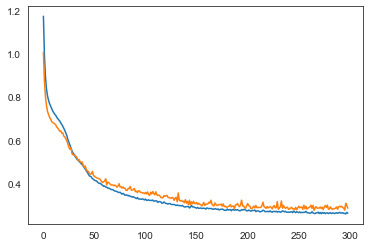

In [48]:
model_reg=Sequential()
model_reg.add(Dense(units=15, activation='tanh', input_shape=(15,), kernel_regularizer=regularizers.l2(0.06)))

model_reg.add(Dense(units=12, activation='tanh'))
model_reg.add(Dense(units=1))
model_reg.summary()

model_reg.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
Hist_reg=model_reg.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist_reg.history['loss'][1:])
plt.plot(Hist_reg.history['val_loss'][1:])

### Modèle dropout ###

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                240       
                                                                 
 dense_7 (Dense)             (None, 12)                192       
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 1.7628 - mean_squared_error: 0.9793 - val_loss: 1.4040 - val_mean_squared_error: 0.7526
Epoch 2/300
94/94 [==============================] - 0s 2ms/step - loss: 1.3163 - mean_squared_error: 0.7761 - val_loss: 1.1487 - val_mean_squared_error: 0.710

94/94 [==============================] - 0s 2ms/step - loss: 0.4648 - mean_squared_error: 0.3943 - val_loss: 0.4531 - val_mean_squared_error: 0.3817
Epoch 47/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4577 - mean_squared_error: 0.3853 - val_loss: 0.4495 - val_mean_squared_error: 0.3767
Epoch 48/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4498 - mean_squared_error: 0.3762 - val_loss: 0.4376 - val_mean_squared_error: 0.3632
Epoch 49/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4408 - mean_squared_error: 0.3661 - val_loss: 0.4458 - val_mean_squared_error: 0.3711
Epoch 50/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4317 - mean_squared_error: 0.3566 - val_loss: 0.4274 - val_mean_squared_error: 0.3524
Epoch 51/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4283 - mean_squared_error: 0.3530 - val_loss: 0.4269 - val_mean_squared_error: 0.3517
Epoch 52/300
94/94 [=====================

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3210 - mean_squared_error: 0.2650 - val_loss: 0.3403 - val_mean_squared_error: 0.2846
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3213 - mean_squared_error: 0.2658 - val_loss: 0.3385 - val_mean_squared_error: 0.2829
Epoch 99/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3207 - mean_squared_error: 0.2652 - val_loss: 0.3386 - val_mean_squared_error: 0.2833
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3166 - mean_squared_error: 0.2614 - val_loss: 0.3307 - val_mean_squared_error: 0.2758
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3187 - mean_squared_error: 0.2642 - val_loss: 0.3479 - val_mean_squared_error: 0.2930
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3295 - mean_squared_error: 0.2749 - val_loss: 0.3368 - val_mean_squared_error: 0.2824
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 2ms/step - loss: 0.2886 - mean_squared_error: 0.2380 - val_loss: 0.3034 - val_mean_squared_error: 0.2529
Epoch 148/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2908 - mean_squared_error: 0.2406 - val_loss: 0.2984 - val_mean_squared_error: 0.2485
Epoch 149/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2902 - mean_squared_error: 0.2402 - val_loss: 0.3042 - val_mean_squared_error: 0.2541
Epoch 150/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2891 - mean_squared_error: 0.2390 - val_loss: 0.3057 - val_mean_squared_error: 0.2557
Epoch 151/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2882 - mean_squared_error: 0.2382 - val_loss: 0.3009 - val_mean_squared_error: 0.2513
Epoch 152/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2910 - mean_squared_error: 0.2415 - val_loss: 0.3099 - val_mean_squared_error: 0.2605
Epoch 153/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2838 - mean_squared_error: 0.2395 - val_loss: 0.3043 - val_mean_squared_error: 0.2600
Epoch 198/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2828 - mean_squared_error: 0.2384 - val_loss: 0.2893 - val_mean_squared_error: 0.2450
Epoch 199/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2817 - mean_squared_error: 0.2375 - val_loss: 0.3010 - val_mean_squared_error: 0.2569
Epoch 200/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2775 - mean_squared_error: 0.2332 - val_loss: 0.2917 - val_mean_squared_error: 0.2475
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2789 - mean_squared_error: 0.2348 - val_loss: 0.2871 - val_mean_squared_error: 0.2433
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2779 - mean_squared_error: 0.2339 - val_loss: 0.2897 - val_mean_squared_error: 0.2457
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2751 - mean_squared_error: 0.2339 - val_loss: 0.3012 - val_mean_squared_error: 0.2601
Epoch 248/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2751 - mean_squared_error: 0.2337 - val_loss: 0.2898 - val_mean_squared_error: 0.2486
Epoch 249/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2767 - mean_squared_error: 0.2355 - val_loss: 0.2943 - val_mean_squared_error: 0.2530
Epoch 250/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2792 - mean_squared_error: 0.2380 - val_loss: 0.2952 - val_mean_squared_error: 0.2538
Epoch 251/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2752 - mean_squared_error: 0.2339 - val_loss: 0.2890 - val_mean_squared_error: 0.2477
Epoch 252/300
94/94 [==============================] - 0s 1ms/step - loss: 0.2730 - mean_squared_error: 0.2317 - val_loss: 0.2953 - val_mean_squared_error: 0.2542
Epoch 253/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2771 - mean_squared_error: 0.2371 - val_loss: 0.2868 - val_mean_squared_error: 0.2469
Epoch 298/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2700 - mean_squared_error: 0.2301 - val_loss: 0.3050 - val_mean_squared_error: 0.2651
Epoch 299/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2761 - mean_squared_error: 0.2362 - val_loss: 0.2925 - val_mean_squared_error: 0.2525
Epoch 300/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2723 - mean_squared_error: 0.2325 - val_loss: 0.2827 - val_mean_squared_error: 0.2427


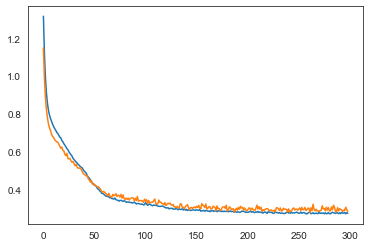

In [49]:
model_drop=Sequential()
model_drop.add(Dense(units=15, activation='tanh', input_shape=(15,), kernel_regularizer=regularizers.l2(0.065)))
model.add(Dropout(0.2))
model_drop.add(Dense(units=12, activation='tanh'))
model_drop.add(Dense(units=1))
model_drop.summary()

model_drop.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
Hist_drop=model_drop.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist_drop.history['loss'][1:])
plt.plot(Hist_drop.history['val_loss'][1:])

### Plot des courbes d'apprentissage des modèles ###

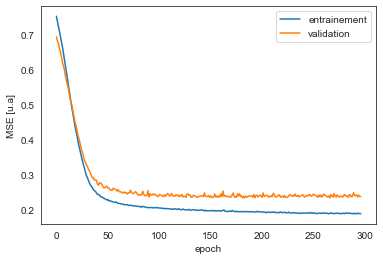

0.2330419272184372


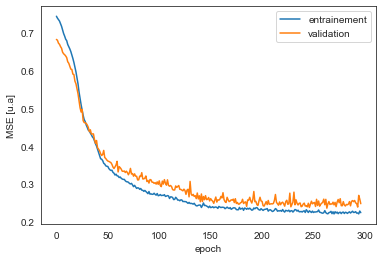

0.23587514460086823


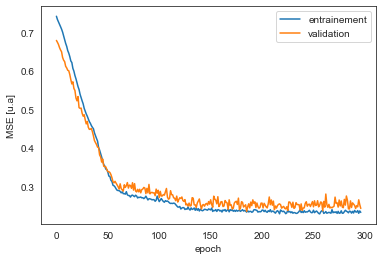

0.23476170003414154


In [50]:
plt.plot(Hist.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()
print(np.min(Hist.history['val_mean_squared_error'][3:]))

plt.plot(Hist_reg.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist_reg.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()

print(np.min(Hist_reg.history['val_mean_squared_error'][3:]))

plt.plot(Hist_drop.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist_drop.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()
print(np.min(Hist_drop.history['val_mean_squared_error'][3:]))


### Résultats des modèles (plot y_pred y_test) ###

79/79 [==============================] - 0s 916us/step
0.21927872637713067


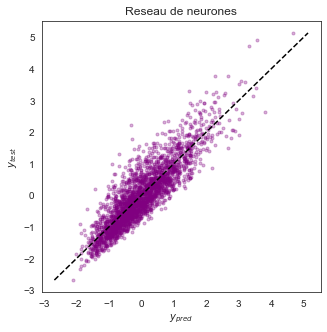

79/79 [==============================] - 0s 878us/step
0.23985723534417422


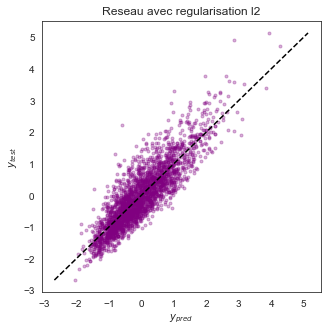

79/79 [==============================] - 0s 1ms/step
0.2371705794046522


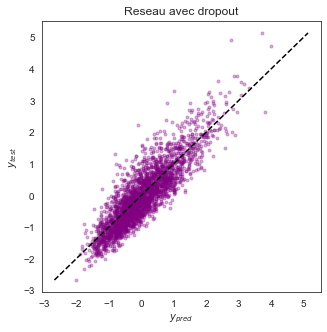

In [51]:
y_pred_test=model.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_test))))
      
fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau de neurones")
plt.show()

y_pred_test=model_reg.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_test))))

fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau avec regularisation l2")
plt.show()

y_pred_test=model_drop.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_test))))

fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau avec dropout")
plt.show()

# Monte-Carlo #
## Calcul de "signatures" en énergie ## 

79/79 [==============================] - 0s 891us/step


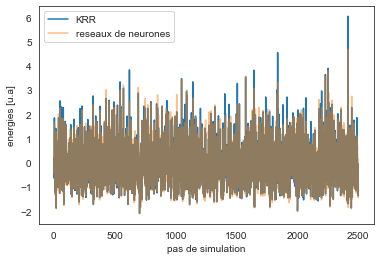

In [52]:
y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)

y_pred_test=model.predict(X_test_soap_red)
plt.plot(y_pred_test_krr_soap,label='KRR')
plt.plot(y_pred_test,alpha=0.5,label='reseaux de neurones')
plt.xlabel('pas de simulation')
plt.ylabel('energies [u.a]')
plt.legend()

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


E moyen : -0.0074470703125  +-  0.9074976399941982
E moyen : 1.1368683772161604e-17  +-  1.0


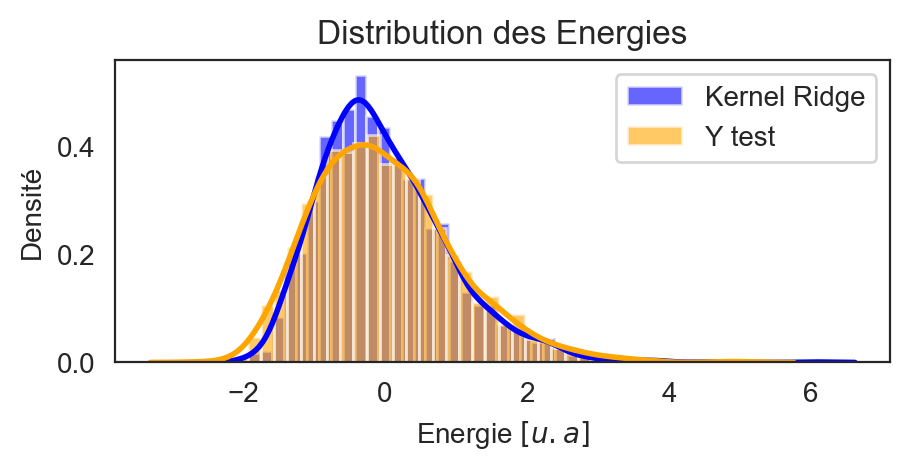

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


E moyen : -0.002492039  +-  0.89818645
E moyen : 1.1368683772161604e-17  +-  1.0


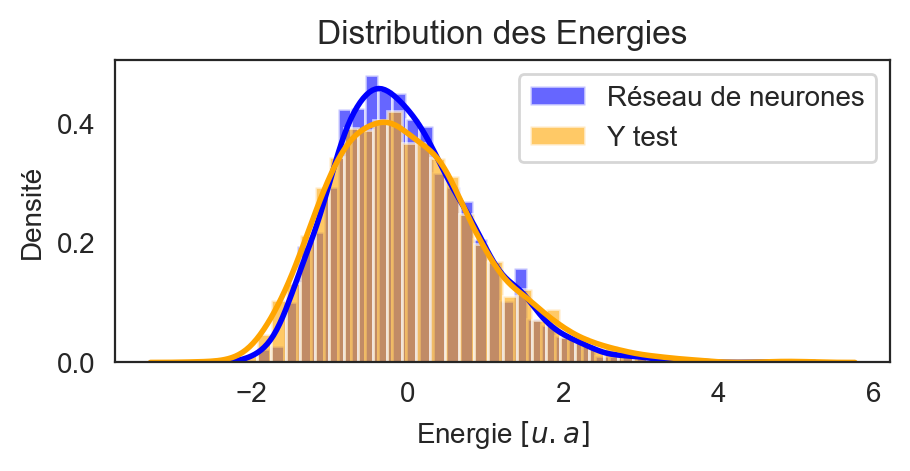

In [53]:
import seaborn as sns
sns.set_style("white")


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(y_pred_test_krr_soap), color="blue", **kwargs,label="Kernel Ridge")
print("E moyen :",y_pred_test_krr_soap.mean()," +- ",y_pred_test_krr_soap.std())
sns.distplot(pd.DataFrame(y_test), color="orange", **kwargs,label="Y test")
print("E moyen :",y_test.mean()," +- ",y_test.std())

plt.legend()
plt.xlabel(r'Energie $[u.a]$')
plt.ylabel("Densité")

plt.title("Distribution des Energies")
plt.show()
plt.figure(figsize=(5,2), dpi= 200)

# plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(y_pred_test), color="blue", **kwargs,label="Réseau de neurones")
print("E moyen :",y_pred_test.mean()," +- ",y_pred_test.std())
sns.distplot(pd.DataFrame(y_test), color="orange", **kwargs,label="Y test")
print("E moyen :",y_test.mean()," +- ",y_test.std())

plt.legend()
plt.xlabel(r'Energie $[u.a]$')
plt.ylabel("Densité")

plt.title("Distribution des Energies")
plt.show()


## Generation des positions Monte-Carlo

In [55]:
#genere un fichier xyz
def generate_xyz(positions, filename):
  # Open the file for writing
  with open(filename, 'w') as f:
    for position in positions :
        # Write the number of atoms to the file
        f.write(str(len(position)) + '\n')
        f.write('\n')

        # Loop over the atomic positions
        for pos in position:
          # Write the atomic symbol and coordinates to the file
            if(pos[0]==0.):
                f.write('O ' + ' '.join(str(x) for x in pos[1:4]) + '\n')
            if(pos[0]==1.):
                f.write('H ' + ' '.join(str(x) for x in pos[1:4]) + '\n')
            
class Monte_Carlo:
    def __init__(self, dataset,model,yscaler,temp,E_min):
        self.model=model
        self.dataset=dataset
        self.yscaler=yscaler
        self.E_min=E_min
        self.E_temp=temp*Boltzmann/eV
        soap_vect,pca=SOAP_Vectors("new_positions_sparse.xyz", cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca_d=15)
        soapscaler=StandardScaler()
        self.soapscaler=soapscaler.fit(soap_vect)
        self.pca=pca
        O1 =self.dataset[:,0,1:4]
        O2 =self.dataset[:,1,1:4]
        H  =self.dataset[:,2,1:4]
        H11=self.dataset[:,5,1:4]
        H12=self.dataset[:,6,1:4]
        H21=self.dataset[:,3,1:4]
        H22=self.dataset[:,4,1:4]
        H_O1       = O1-H
        H_O2       = O2-H
        O1_H11     = H11-O1
        O1_H12     = H12-O1
        O2_H21     = H21-O2
        O2_H22     = H22-O2
        #ecart typique permis dans une etape
        self.H_O1_std       = 0.01*(O1-H).std()
        self.H_O2_std       = 0.01*(O2-H).std()
        self.O1_H11_std     = 0.01*(H11-O1).std()
        self.O1_H12_std     = 0.01*(H12-O1).std()
        self.O2_H21_std     = 0.01*(H21-O2).std()
        self.O2_H22_std     = 0.01*(H22-O2).std()
        self.O1_H_O2_std    = 0.01*(vg.angle(H_O1,H_O2)).std()
        self.H22_O2_H21_std = 0.01*(vg.angle(O2_H21,O2_H22)).std()
        self.H12_O1_H11_std = 0.01*(vg.angle(O1_H11,O1_H12)).std()
        

    def create_config(self,config):
        O1 =config[0,1:4]
        O2 =config[1,1:4]
        H  =config[2,1:4]
        H21=config[3,1:4]
        H22=config[4,1:4]
        H11=config[5,1:4]
        H12=config[6,1:4]
        
        H_O1       = O1-H
        H_O2       = O2-H
        O1_H11     = H11-O1
        O1_H12     = H12-O1
        O2_H21     = H21-O2
        O2_H22     = H22-O2
        O1_H_O2    = vg.angle(H_O1,H_O2)
        H22_O2_H21 = vg.angle(O2_H21,O2_H22)
        H12_O1_H11 = vg.angle(O1_H11,O1_H12)
        
        d_H_O1       = np.random.normal(loc=0, scale=self.H_O1_std      )
        d_H_O2       = np.random.normal(loc=0, scale=self.H_O2_std      )
        d_O1_H11     = np.random.normal(loc=0, scale=self.O1_H11_std    )
        d_O1_H12     = np.random.normal(loc=0, scale=self.O1_H12_std    )
        d_O2_H21     = np.random.normal(loc=0, scale=self.O2_H21_std    )
        d_O2_H22     = np.random.normal(loc=0, scale=self.O2_H22_std    )
        d_O1_H_O2    = np.random.normal(loc=0, scale=self.O1_H_O2_std   )
        d_H22_O2_H21 = np.random.normal(loc=0, scale=self.H22_O2_H21_std)
        d_H12_O1_H11 = np.random.normal(loc=0, scale=self.H12_O1_H11_std)
        new_H  = H
        r,t,p  = cartesian_to_polar_3d(H_O1)
        new_O1 = new_H + polar_to_cartesian_3d(r+d_H_O1,t+d_O1_H_O2/4,p+d_O1_H_O2/4)
        r,t,p  = cartesian_to_polar_3d(H_O2)
        new_O2 = new_H + polar_to_cartesian_3d(r+d_H_O2,t+d_O1_H_O2/4,p+d_O1_H_O2/4)
        r,t,p  = cartesian_to_polar_3d(O1_H11)
        new_H11= new_O1 + polar_to_cartesian_3d(r+d_O1_H11,t+d_H12_O1_H11/4,p+d_H12_O1_H11/4)
        r,t,p  = cartesian_to_polar_3d(O1_H12)
        new_H12= new_O1 + polar_to_cartesian_3d(r+d_O1_H12,t+d_H12_O1_H11/4,p+d_H12_O1_H11/4)
        r,t,p  = cartesian_to_polar_3d(O2_H21)
        new_H21= new_O2 + polar_to_cartesian_3d(r+d_O2_H21,t+d_H22_O2_H21/4,p+d_H22_O2_H21/4)
        r,t,p  = cartesian_to_polar_3d(O2_H22)
        new_H22= new_O2 + polar_to_cartesian_3d(r+d_O2_H22,t+d_H22_O2_H21/4,p+d_H22_O2_H21/4)
        new_config=np.copy(config)
        new_config[0,1:4]=new_O1 
        new_config[1,1:4]=new_O2 
        new_config[2,1:4]=new_H  
        new_config[3,1:4]=new_H21
        new_config[4,1:4]=new_H22
        new_config[5,1:4]=new_H11
        new_config[6,1:4]=new_H12
        return new_config
    
    #calcul d'energie d'une configuration
    def GetEnergy(self,config):
        generate_xyz([config], "a.xyz")
        Soap_pca=SOAP_Vector("a.xyz",  cutoff=5., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca=self.pca)
        Soap_pca_red=self.soapscaler.transform(Soap_pca)
        y_pred=self.model.predict(Soap_pca_red)
        E_pred=self.yscaler.inverse_transform(y_pred)
        return E_pred[0,0]
        
    #probabilité selon la distribution de Boltzmann
    def get_proba(self,E_last,E_new):
        return np.exp((E_last-E_new)/(self.E_temp))
    
    def run_mcmc(self,config_init,N_config):
        dataset_gen=[]
        energies_gen=[]
        E_last=self.GetEnergy(config_init)
        new_config=config_init
        dataset_gen.append(new_config)
        energies_gen.append(E_last)
        while(N_config> len(energies_gen)):
            test_config=self.create_config(new_config)
            E_pred=self.GetEnergy(test_config)
            if (E_pred <= E_last ):
                if (E_pred >= self.E_min):
                    new_config=test_config
                    dataset_gen.append(new_config)
                    energies_gen.append(E_pred)
            else :
                if(self.get_proba(E_last,E_pred)>np.random.uniform()):
                    new_config=test_config
                    dataset_gen.append(new_config)
                    energies_gen.append(E_pred)
        return np.array(dataset_gen),np.array(energies_gen)


def cartesian_to_polar_3d(vector):
  # Convert the input vector to a NumPy array
  v = np.array(vector)
  
  # Calculate the polar coordinates
  r = np.linalg.norm(v)
  theta = np.arccos(v[2] / r)
  phi = np.arctan2(v[1], v[0])
  
  # Return the polar coordinates
  return (r, theta, phi)

def polar_to_cartesian_3d(r, theta, phi):
  # Calculate the Cartesian coordinates
  x = r * np.sin(theta) * np.cos(phi)
  y = r * np.sin(theta) * np.sin(phi)
  z = r * np.cos(theta)
  
  # Return the Cartesian coordinates
  return (x, y, z)


krrsoap = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=2,param_grid={'alpha': [3.1622776601683794e-12], 'gamma': [3.162277660168379e-06]})
krrsoap.fit(X_train_soap_red, y_train)
MC=Monte_Carlo(dataset,model=krrsoap,yscaler=yscaler,temp=0.00001,E_min=energies[1:].min())


C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.71017e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.98639e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.48205e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


loaded xyz file: new_positions_sparse.xyz, with 10000 frames and elements: [1 8]


In [56]:
#Nous generons les positions et energies
new_dataset,new_energies=MC.run_mcmc(dataset[11],2000)


## Resultats du Monte-Carlo

In [57]:
generate_xyz(new_dataset, "mcmc.xyz")
nv.show_mdtraj(mdt.load_xyz("mcmc.xyz", top='zundel.pdb'))

OSError: No such file: zundel.pdb

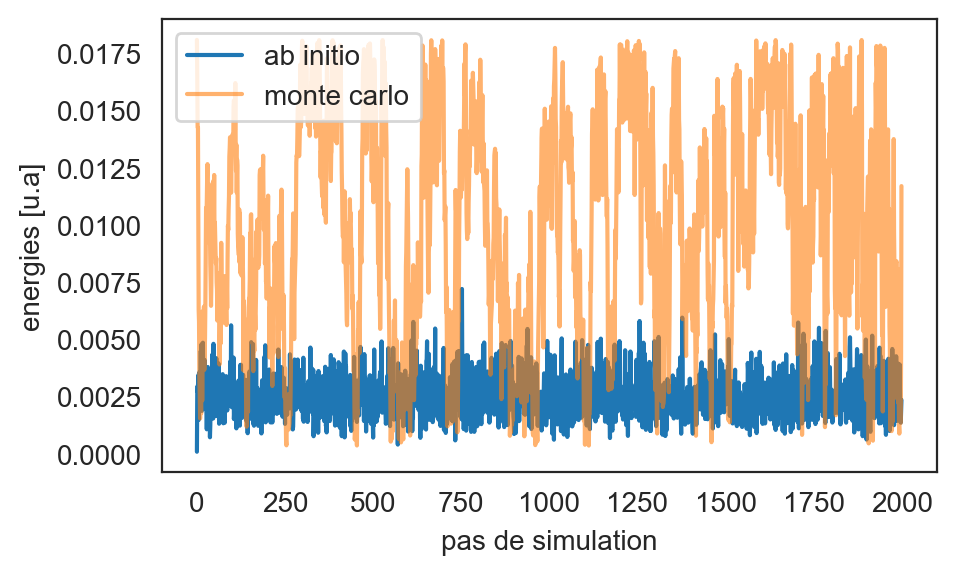

In [58]:
plt.figure(figsize=(5,3), dpi= 200)

#Visualisation des energies
plt.plot(energies[:2000],label='ab initio')
plt.plot(new_energies,alpha=0.6,label="monte carlo")
plt.xlabel('pas de simulation')
plt.ylabel('energies [u.a]')
plt.legend()

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


E moyen : 0.002538257316696719  +-  0.0009099056886874164
E moyen : 0.010165096303859759  +-  0.004779960631924897


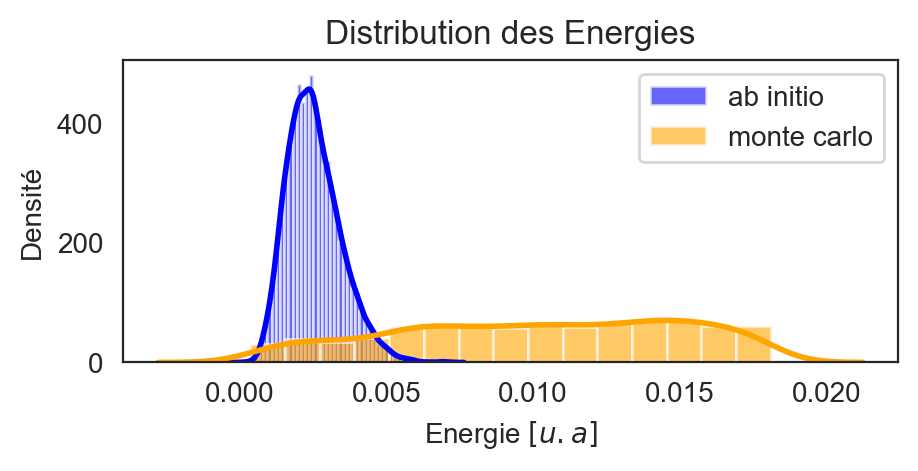

In [59]:
#nous recalculons les distributions des descripteurs géometriques
plt.figure(figsize=(5,2), dpi= 200)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(energies), color="blue", **kwargs,label="ab initio")
print("E moyen :",energies.mean()," +- ",energies.std())
sns.distplot(pd.DataFrame(new_energies), color="orange", **kwargs,label="monte carlo")
print("E moyen :",new_energies.mean()," +- ",new_energies.std())

plt.legend()
plt.xlabel(r'Energie $[u.a]$')
plt.ylabel("Densité")

plt.title("Distribution des Energies")
plt.show()

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


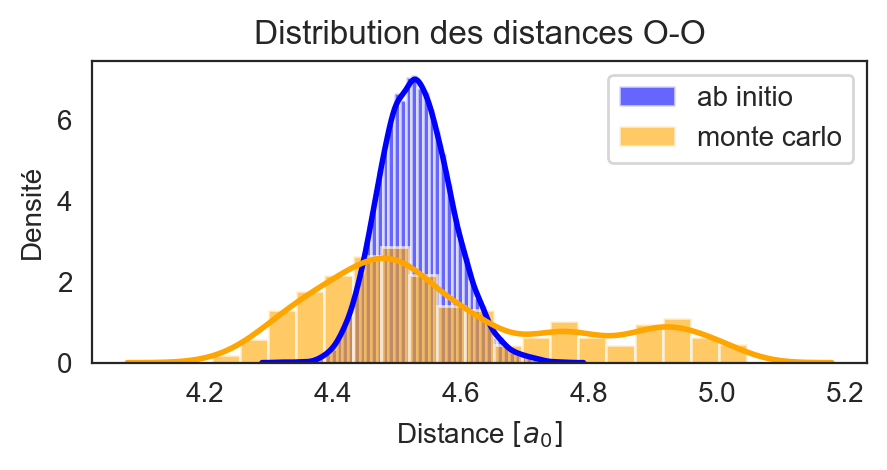

No handles with labels found to put in legend.


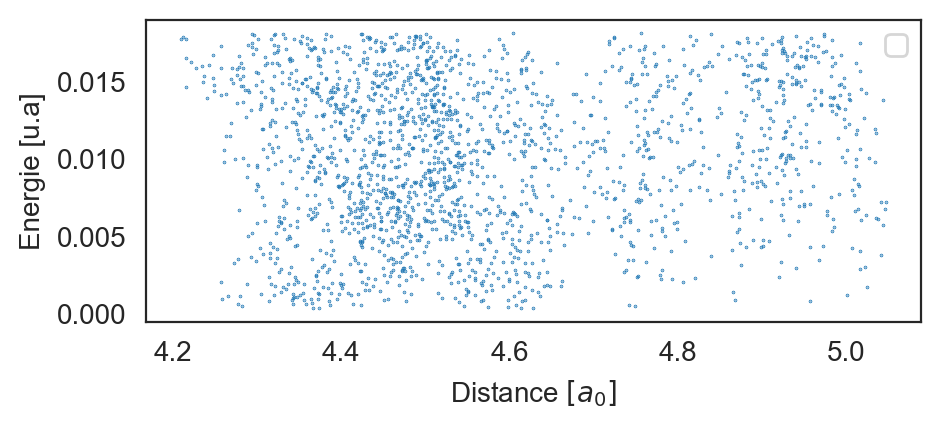

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


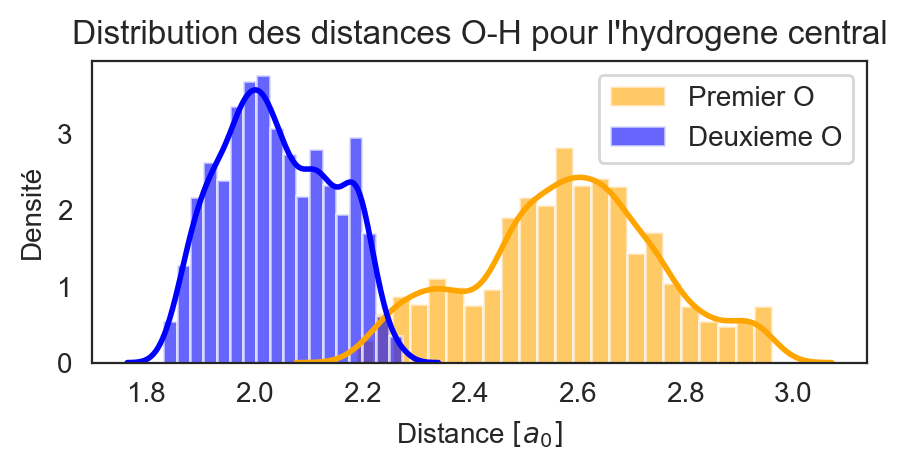

No handles with labels found to put in legend.


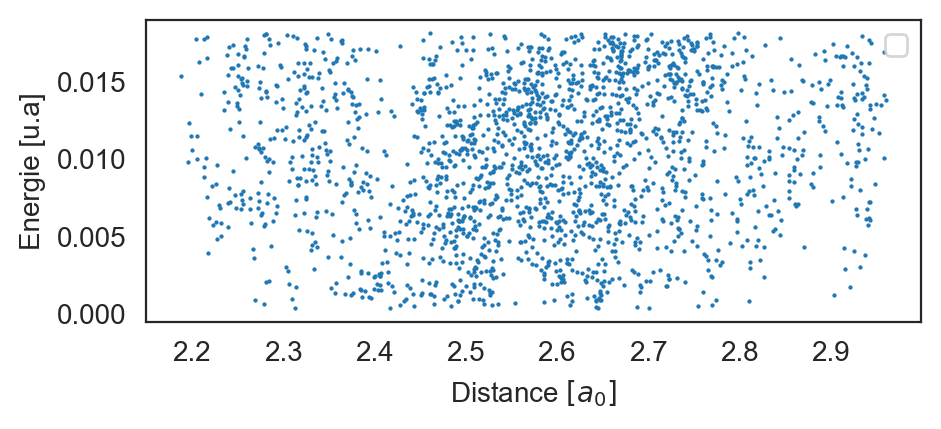

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


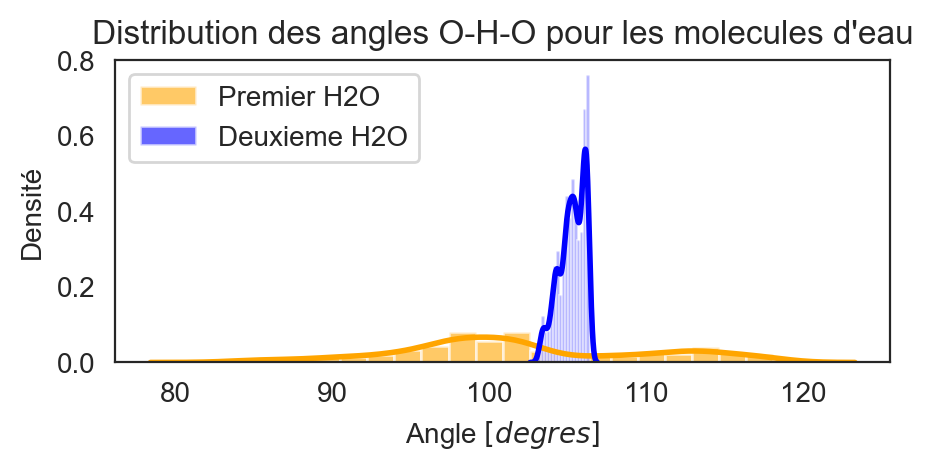

No handles with labels found to put in legend.


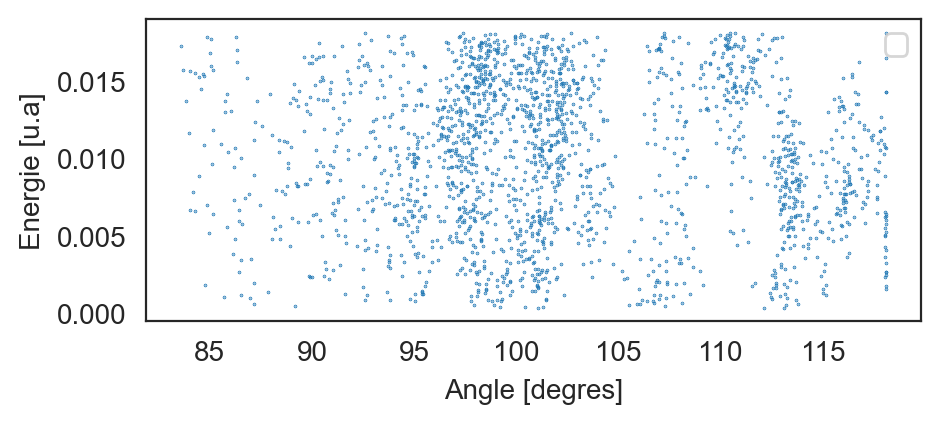

In [60]:
import seaborn as sns
sns.set_style("white")

O1_old=dataset[:,0,1:4]
O2_old=dataset[:,1,1:4]
O2_O1_old=O1_old-O2_old
dO_O_old=np.linalg.norm(O2_O1_old,axis=1)


O1=new_dataset[:,0,1:4]
O2=new_dataset[:,1,1:4]
H=new_dataset[:,2,1:4]
H11=new_dataset[:,5,1:4]
H12=new_dataset[:,6,1:4]
H21=new_dataset[:,3,1:4]
H22=new_dataset[:,4,1:4]

O2_O1=O1-O2
O2_H=H-O2
O1_H=H-O1
O1_H11=H11-O1
O1_H12=H12-O1
O2_H21=H21-O2
O2_H22=H22-O2


dO_O=np.linalg.norm(O2_O1,axis=1)
dO1_H=np.linalg.norm(O1_H,axis=1)
dO2_H=np.linalg.norm(O2_H,axis=1)

H22_O2_H21 = vg.angle(O2_H21,O2_H22)
H12_O1_H11 = vg.angle(O1_H11,O1_H12)

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(dO_O_old), color="blue", **kwargs,label='ab initio')

sns.distplot(pd.DataFrame(dO_O), color="orange", **kwargs,label='monte carlo')
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Densité")
plt.legend()
plt.title("Distribution des distances O-O")
plt.show()

plt.figure(figsize=(5,2), dpi= 200)
plt.scatter(dO_O,new_energies,s=0.3,marker='.')


plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Energie [u.a]")

plt.show()


plt.figure(figsize=(5,2), dpi= 200)

sns.distplot(pd.DataFrame(dO1_H), color="orange", label="Premier O", **kwargs)
sns.distplot(pd.DataFrame(dO2_H), color="blue", label="Deuxieme O", **kwargs)


plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Densité")

plt.title("Distribution des distances O-H pour l'hydrogene central")

plt.show()

plt.figure(figsize=(5,2), dpi= 200)
plt.scatter(dO1_H,new_energies,s=0.3)


plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Energie [u.a]")

plt.show()

plt.figure(figsize=(5,2), dpi= 200)

sns.distplot(pd.DataFrame(H22_O2_H21), color="orange", label="Premier H2O", **kwargs)
sns.distplot(pd.DataFrame(H12_O1_H11), color="blue", label="Deuxieme H2O", **kwargs)


plt.xlabel(r'Angle $[degres]$')
plt.ylabel("Densité")

plt.title("Distribution des angles O-H-O pour les molecules d'eau")
plt.legend()

plt.show()

plt.figure(figsize=(5,2), dpi= 200)
plt.scatter(H22_O2_H21,new_energies,s=0.3,marker='.')


plt.legend()
plt.xlabel(r'Angle [degres]')
plt.ylabel("Energie [u.a]")
plt.show()